In [245]:
import sys
sys.path.append("../../")
import helper
from pandas import read_excel,DataFrame,melt,merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

In [75]:
origin=read_excel("공모전 및 프로젝트 엑셀파일/생활환경+만족도(2005년+이후)_2022년기준.xlsx")
origin

,구분별,종합,주거환경,경제환경,사회환경,교육환경
0,성별_남성,6.62,7.20,6.49,6.56,6.22
1,성별_여성,6.50,7.18,6.22,6.42,6.17
2,연령별_20대 이하,6.34,7.07,6.14,6.26,5.91
3,연령별_30대,6.56,7.05,6.47,6.44,6.29
4,연령별_40대,6.75,7.36,6.62,6.66,6.37
...,...,...,...,...,...,...
57,지역소분류_강동구,6.68,7.28,6.29,6.56,6.58
58,직업분류_관리전문직,6.56,7.00,6.56,6.51,6.19
59,직업분류_화이트칼라,6.63,7.23,6.47,6.52,6.29
60,직업분류_블루칼라,6.55,7.21,6.39,6.48,6.13


In [76]:
df=origin.copy()
df.head()

,구분별,종합,주거환경,경제환경,사회환경,교육환경
0,성별_남성,6.62,7.20,6.49,6.56,6.22
1,성별_여성,6.50,7.18,6.22,6.42,6.17
2,연령별_20대 이하,6.34,7.07,6.14,6.26,5.91
3,연령별_30대,6.56,7.05,6.47,6.44,6.29
4,연령별_40대,6.75,7.36,6.62,6.66,6.37


In [246]:
df.isna().sum()

구분별     0
종합      0
주거환경    0
경제환경    0
사회환경    0
교육환경    0
dtype: int64

In [125]:
df_men_women=df.iloc[0:2]
df_men_women

,구분별,종합,주거환경,경제환경,사회환경,교육환경
0,성별_남성,6.62,7.20,6.49,6.56,6.22
1,성별_여성,6.50,7.18,6.22,6.42,6.17


In [126]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.unicode_minus"] = False

In [127]:
#현재 상태로는 한 그래프에 표시할 수 없으므로 멜트 함수 이용해서 재정렬 진행
df_men_women = df_men_women.melt(id_vars=['구분별'], var_name='항목', value_name='점수')
df_men_women

,구분별,항목,점수
0,성별_남성,종합,6.62
1,성별_여성,종합,6.50
2,성별_남성,주거환경,7.20
3,성별_여성,주거환경,7.18
4,성별_남성,경제환경,6.49
5,성별_여성,경제환경,6.22
6,성별_남성,사회환경,6.56
7,성별_여성,사회환경,6.42
8,성별_남성,교육환경,6.22
9,성별_여성,교육환경,6.17


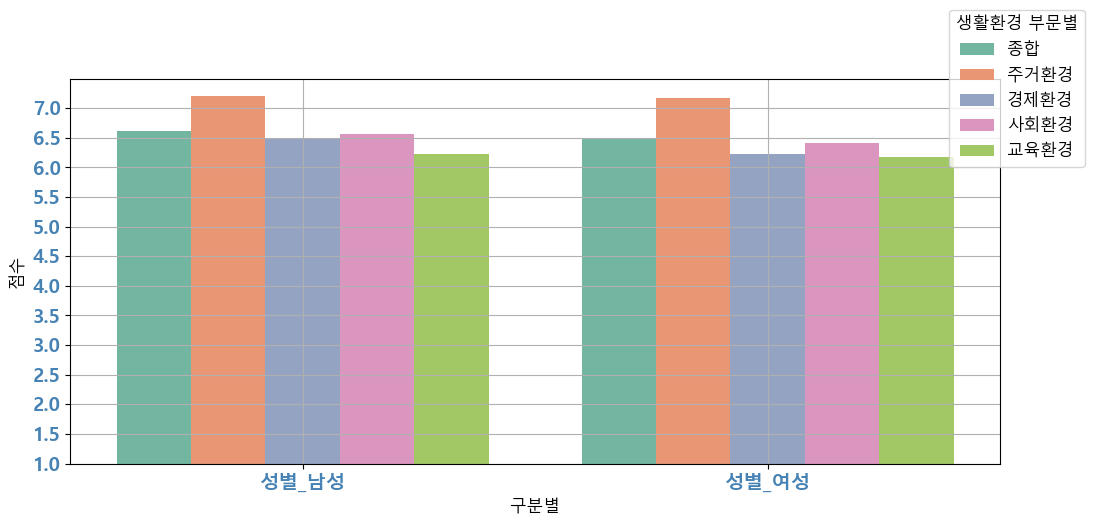

In [160]:
plt.figure(figsize=(12,5))
plt.ylim(1, 7.5)  # y축 눈금 범위 설정 (1부터 7.5까지)
plt.yticks(np.arange(1, 7.5, 0.5))  # y축 눈금 위치 설정 (0.5 간격)
sb.barplot(data=df_men_women, x='구분별', y='점수', hue='항목', palette='Set2')
plt.xticks(fontsize=14,color="steelblue",fontweight='bold')
plt.yticks(fontsize=14,color="steelblue",fontweight='bold')
plt.grid()
plt.legend(title="생활환경 부문별",loc='upper right',bbox_to_anchor=(1.1,1.2))
plt.show()
plt.close()

성별로 구분하여 그래프 확인 결과 남성쪽이 전반적으로 생활환경 만족도가 더 높은것으로 확인되었다.

In [166]:
df_age=df.iloc[2:7]
df_age

,구분별,종합,주거환경,경제환경,사회환경,교육환경
2,연령별_20대 이하,6.34,7.07,6.14,6.26,5.91
3,연령별_30대,6.56,7.05,6.47,6.44,6.29
4,연령별_40대,6.75,7.36,6.62,6.66,6.37
5,연령별_50대,6.61,7.22,6.48,6.55,6.19
6,연령별_60대 이상,6.52,7.18,6.27,6.51,6.12


In [167]:
#현재 상태로는 한 그래프에 표시할 수 없으므로 멜트 함수 이용해서 재정렬 진행
df_age = df_age.melt(id_vars=['구분별'], var_name='항목', value_name='점수')
df_age

,구분별,항목,점수
0,연령별_20대 이하,종합,6.34
1,연령별_30대,종합,6.56
2,연령별_40대,종합,6.75
3,연령별_50대,종합,6.61
4,연령별_60대 이상,종합,6.52
5,연령별_20대 이하,주거환경,7.07
6,연령별_30대,주거환경,7.05
7,연령별_40대,주거환경,7.36
8,연령별_50대,주거환경,7.22
9,연령별_60대 이상,주거환경,7.18


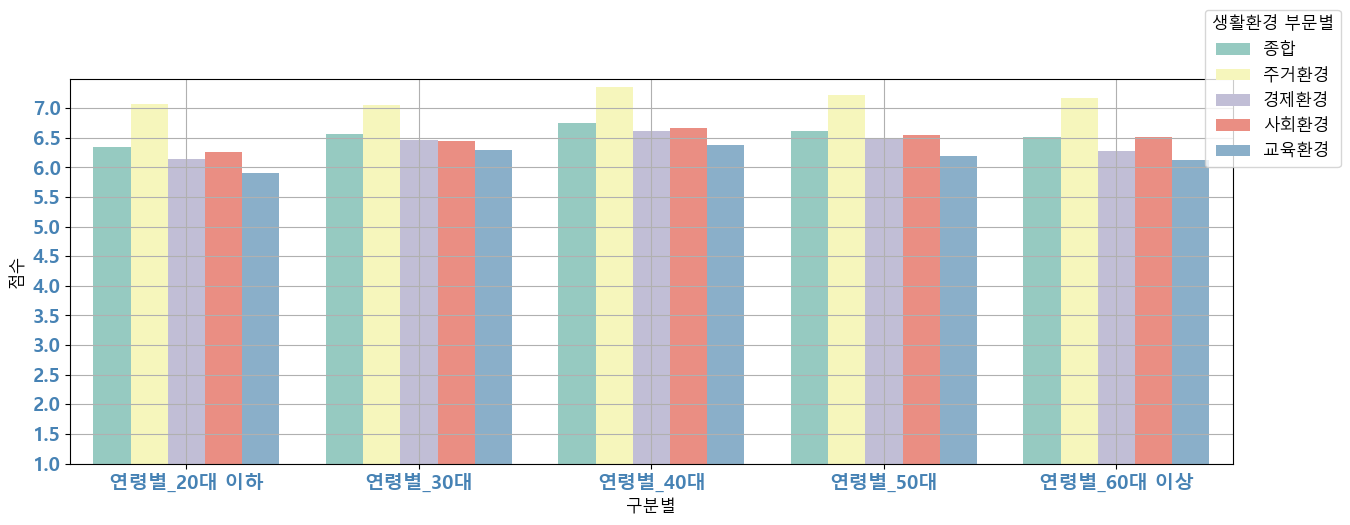

In [179]:
plt.figure(figsize=(15,5))
plt.ylim(1, 7.5)  # y축 눈금 범위 설정 (1부터 7.5까지)
plt.yticks(np.arange(1, 7.5, 0.5))  # y축 눈금 위치 설정 (0.5 간격)
sb.barplot(data=df_age, x='구분별', y='점수', hue='항목', palette='Set3')
plt.xticks(fontsize=14,color="steelblue",fontweight='bold')
plt.yticks(fontsize=14,color="steelblue",fontweight='bold')
plt.grid()
plt.legend(title="생활환경 부문별",loc='upper right',bbox_to_anchor=(1.1,1.2))
plt.show()
plt.close()

연령별대로 구분해서 그래프 확인 결과 생활환경 만족도가 가장 높은 연령대는 40대가 가장 높은것으로 나왔다. 이는 아무래도 경제적이나 사회적으로 완전한 독립을 이뤘기 때문이라고 추정된다. 반대로 만족도가 가장 낮은 연령대는 20대 이하인것으로 나왔다.이는 복합적인 요인이 있을 수 있겠으나 전반적으로 취업 불안이나 세대 갈등 등이 원인으로 보여진다

In [182]:
df_academic=df.iloc[7:11]
df_academic

,구분별,종합,주거환경,경제환경,사회환경,교육환경
7,학력별_중졸 이하,6.44,7.17,6.06,6.47,6.08
8,학력별_고졸 이하,6.58,7.24,6.38,6.56,6.13
9,학력별_대졸이하,6.61,7.17,6.50,6.51,6.26
10,학력별_대학원 이상,6.90,7.36,6.83,6.78,6.63


In [183]:
#현재 상태로는 한 그래프에 표시할 수 없으므로 멜트 함수 이용해서 재정렬 진행
df_academic = df_academic.melt(id_vars=['구분별'], var_name='항목', value_name='점수')
df_academic

,구분별,항목,점수
0,학력별_중졸 이하,종합,6.44
1,학력별_고졸 이하,종합,6.58
2,학력별_대졸이하,종합,6.61
3,학력별_대학원 이상,종합,6.90
4,학력별_중졸 이하,주거환경,7.17
5,학력별_고졸 이하,주거환경,7.24
6,학력별_대졸이하,주거환경,7.17
7,학력별_대학원 이상,주거환경,7.36
8,학력별_중졸 이하,경제환경,6.06
9,학력별_고졸 이하,경제환경,6.38


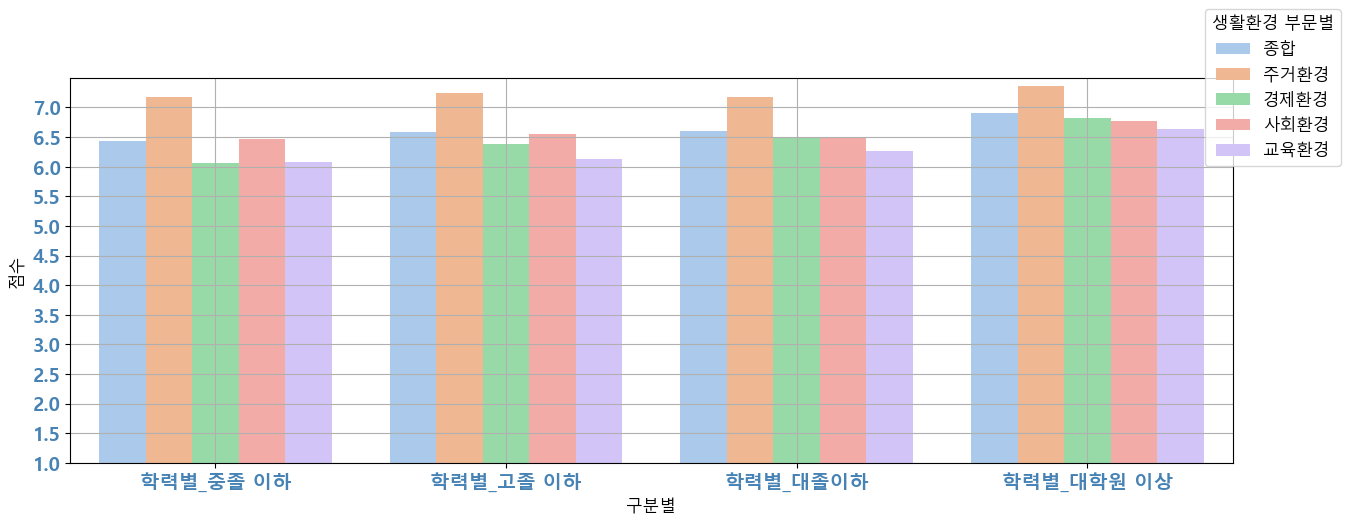

In [185]:
plt.figure(figsize=(15,5))
plt.ylim(1, 7.5)  # y축 눈금 범위 설정 (1부터 7.5까지)
plt.yticks(np.arange(1, 7.5, 0.5))  # y축 눈금 위치 설정 (0.5 간격)
sb.barplot(data=df_academic, x='구분별', y='점수', hue='항목', palette='pastel')
plt.xticks(fontsize=14,color="steelblue",fontweight='bold')
plt.yticks(fontsize=14,color="steelblue",fontweight='bold')
plt.grid()
plt.legend(title="생활환경 부문별",loc='upper right',bbox_to_anchor=(1.1,1.2))
plt.show()
plt.close()

학력별로 구분하여 그래프 확인 결과 전반적인 만족도는 대학원졸업 이상 그룹이 만족도가 가장 높은것으로 나왔다. 대한민국의 경우 아직까지 학력주의를 벗어나지 못했기 때문에 고학력일수록 경제적,사회적 위치가 높아질 수 밖에 없는 구조이다 보니 이런 결과가 나온것으로 예상된다. 만족도가 가장 낮은 그룹은 중졸이하로 나타났다.

In [191]:
df_house=df.iloc[11:18]
df_house

,구분별,종합,주거환경,경제환경,사회환경,교육환경
11,주택형태별_단독주택,6.39,7.04,6.16,6.37,5.98
12,주택형태별_아파트,6.82,7.43,6.64,6.74,6.47
13,주택형태별_다세대주택,6.43,7.03,6.32,6.35,6.00
14,주택형태별_연립/기타,6.38,6.93,6.25,6.34,6.03
15,주택형태별_자가,6.66,7.29,6.52,6.60,6.24
16,주택형태별_전세,6.60,7.14,6.50,6.55,6.20
17,주택형태별_월세/기타,6.47,7.11,6.19,6.39,6.17


In [193]:
#현재 상태로는 한 그래프에 표시할 수 없으므로 멜트 함수 이용해서 재정렬 진행
df_house = df_house.melt(id_vars=['구분별'], var_name='항목', value_name='점수')
df_house

,구분별,항목,점수
0,주택형태별_단독주택,종합,6.39
1,주택형태별_아파트,종합,6.82
2,주택형태별_다세대주택,종합,6.43
3,주택형태별_연립/기타,종합,6.38
4,주택형태별_자가,종합,6.66
5,주택형태별_전세,종합,6.60
6,주택형태별_월세/기타,종합,6.47
7,주택형태별_단독주택,주거환경,7.04
8,주택형태별_아파트,주거환경,7.43
9,주택형태별_다세대주택,주거환경,7.03


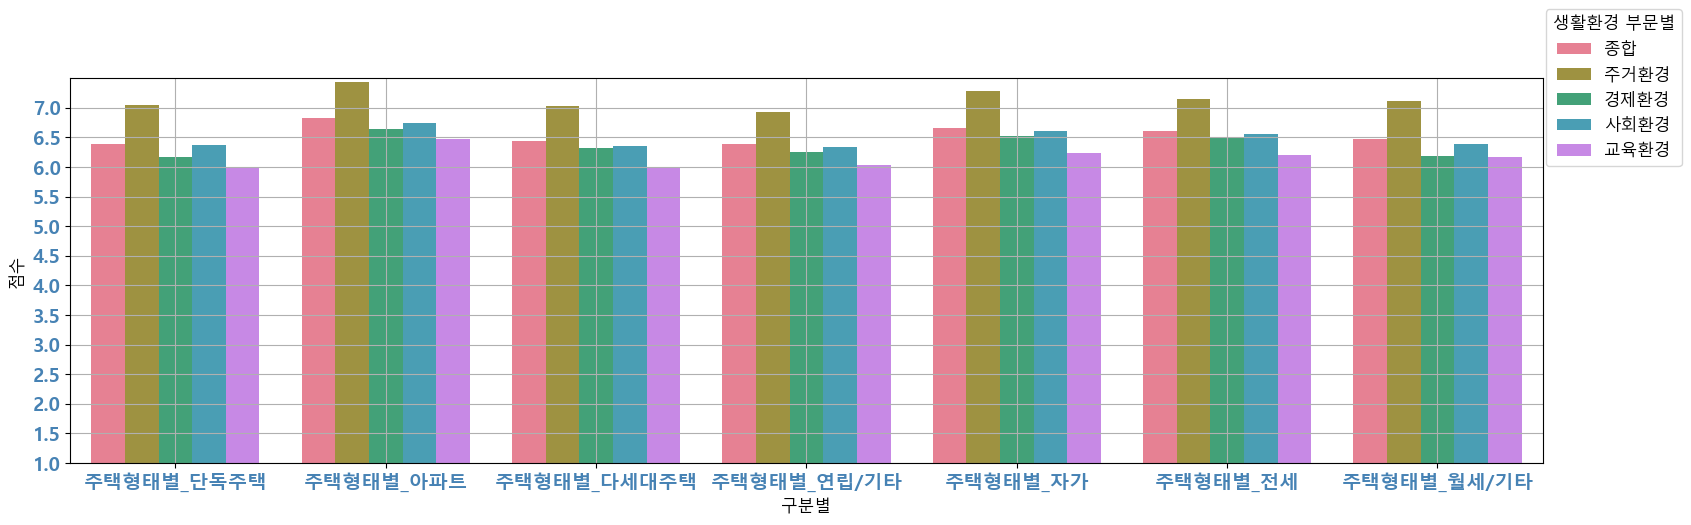

In [198]:
plt.figure(figsize=(19,5))
plt.ylim(1, 7.5)  # y축 눈금 범위 설정 (1부터 7.5까지)
plt.yticks(np.arange(1, 7.5, 0.5))  # y축 눈금 위치 설정 (0.5 간격)
sb.barplot(data=df_house, x='구분별', y='점수', hue='항목', palette='husl')
plt.xticks(fontsize=14,color="steelblue",fontweight='bold')
plt.yticks(fontsize=14,color="steelblue",fontweight='bold')
plt.grid()
plt.legend(title="생활환경 부문별",loc='upper right',bbox_to_anchor=(1.1,1.2))
plt.show()
plt.close()

결과를 이야기하기 전에 해당 카테고리는 원래 2개로 나뉘어야한다(주택형태별/점유형태). 다만 엑셀 파일 확인시 주택형태별로 묶여있어 이대로 진행하게 되었다. 주택형태별로 구분지어 그래프 확인 결과 형태별로는 아파트가 가장 만족도가 높은것으로 나왔다. 예전부터 대한민국은 아파트에 대한 선호도가 월등한것으로 알고 있다(관련 기사:https://news.heraldcorp.com/view.php?ud=20220116000178) 따라서 아파트에 거주하게 되면 전반적인 생활만족도가 올라가는것으로 보여진다. 점유유형을 확인하자면 월세를 제외한 자가,전세는 만족도가 비슷한 수준으로 보여진다.

In [199]:
df_family=df.iloc[18:23]
df_family

,구분별,종합,주거환경,경제환경,사회환경,교육환경
18,가구원수별_1인,6.52,7.14,6.28,6.46,6.20
19,가구원수별_2인,6.59,7.25,6.40,6.53,6.19
20,가구원수별_3인,6.61,7.13,6.49,6.58,6.22
21,가구원수별_4인,6.72,7.32,6.68,6.62,6.28
22,가구원수별_5인 이상,6.11,7.11,5.78,5.92,5.62


In [201]:
#현재 상태로는 한 그래프에 표시할 수 없으므로 멜트 함수 이용해서 재정렬 진행
df_family = df_family.melt(id_vars=['구분별'], var_name='항목', value_name='점수')
df_family

,구분별,항목,점수
0,가구원수별_1인,종합,6.52
1,가구원수별_2인,종합,6.59
2,가구원수별_3인,종합,6.61
3,가구원수별_4인,종합,6.72
4,가구원수별_5인 이상,종합,6.11
5,가구원수별_1인,주거환경,7.14
6,가구원수별_2인,주거환경,7.25
7,가구원수별_3인,주거환경,7.13
8,가구원수별_4인,주거환경,7.32
9,가구원수별_5인 이상,주거환경,7.11


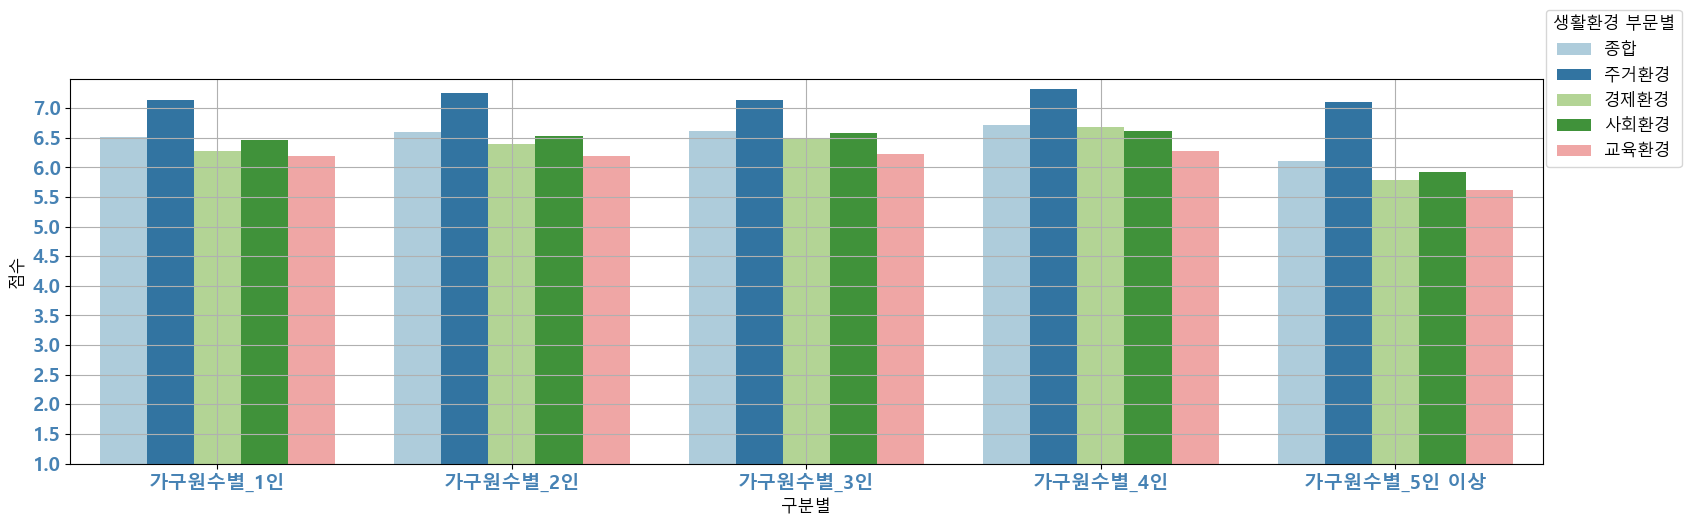

In [208]:
plt.figure(figsize=(19,5))
plt.ylim(1, 7.5)  # y축 눈금 범위 설정 (1부터 7.5까지)
plt.yticks(np.arange(1, 7.5, 0.5))  # y축 눈금 위치 설정 (0.5 간격)
sb.barplot(data=df_family, x='구분별', y='점수', hue='항목',palette='Paired')
plt.xticks(fontsize=14,color="steelblue",fontweight='bold')
plt.yticks(fontsize=14,color="steelblue",fontweight='bold')
plt.grid()
plt.legend(title="생활환경 부문별",loc='upper right',bbox_to_anchor=(1.1,1.2))
plt.show()
plt.close()

가구원수별로 구분지어 그래프 확인 결과 4인가족이 가장 만족도가 높은것으로 확인되었다. 요즘 시대에 4인이라고 하면 아마 부부+자녀2명이 가장 일반적으로 알려져있으며 일반적인 추론을 통해 예상해보자면 아파트 청약같은 경우 신혼부부, 특히 자녀가 있는 경우 가산점을 많이 받고 4명부터 들어갈 수 있는 평수가 커지기 때문이라고 생각된다. 만족도가 가장 낮은 그룹은 의외로 1인이 아니라 5인이상으로 나타났는데 이는 마찬가지로 복합적인 요인이 있을 수 있겠으나 분석가 개인적인 생각으로 부부+자녀1+직계가족(조부모)/부부+자녀2+직계가족일 것이라 생각되며 세대간의 의견 차이로 인해 만족도가 떨어지는 것이라 조심스럽게 예측해본다.

In [211]:
df_money=df.iloc[23:28]
df_money

,구분별,종합,주거환경,경제환경,사회환경,교육환경
23,소득별_200만원 미만,6.17,6.86,5.76,6.28,5.79
24,소득별_200-400만원 미만,6.59,7.23,6.39,6.46,6.26
25,소득별_400-600만원 미만,6.70,7.30,6.54,6.62,6.35
26,소득별_600-800만원 미만,6.64,7.16,6.66,6.60,6.12
27,소득별_800만원 이상,6.77,7.30,6.69,6.75,6.35


In [214]:
#현재 상태로는 한 그래프에 표시할 수 없으므로 멜트 함수 이용해서 재정렬 진행
df_money = df_money.melt(id_vars=['구분별'], var_name='항목', value_name='점수')
df_money

,구분별,항목,점수
0,소득별_200만원 미만,종합,6.17
1,소득별_200-400만원 미만,종합,6.59
2,소득별_400-600만원 미만,종합,6.70
3,소득별_600-800만원 미만,종합,6.64
4,소득별_800만원 이상,종합,6.77
5,소득별_200만원 미만,주거환경,6.86
6,소득별_200-400만원 미만,주거환경,7.23
7,소득별_400-600만원 미만,주거환경,7.30
8,소득별_600-800만원 미만,주거환경,7.16
9,소득별_800만원 이상,주거환경,7.30


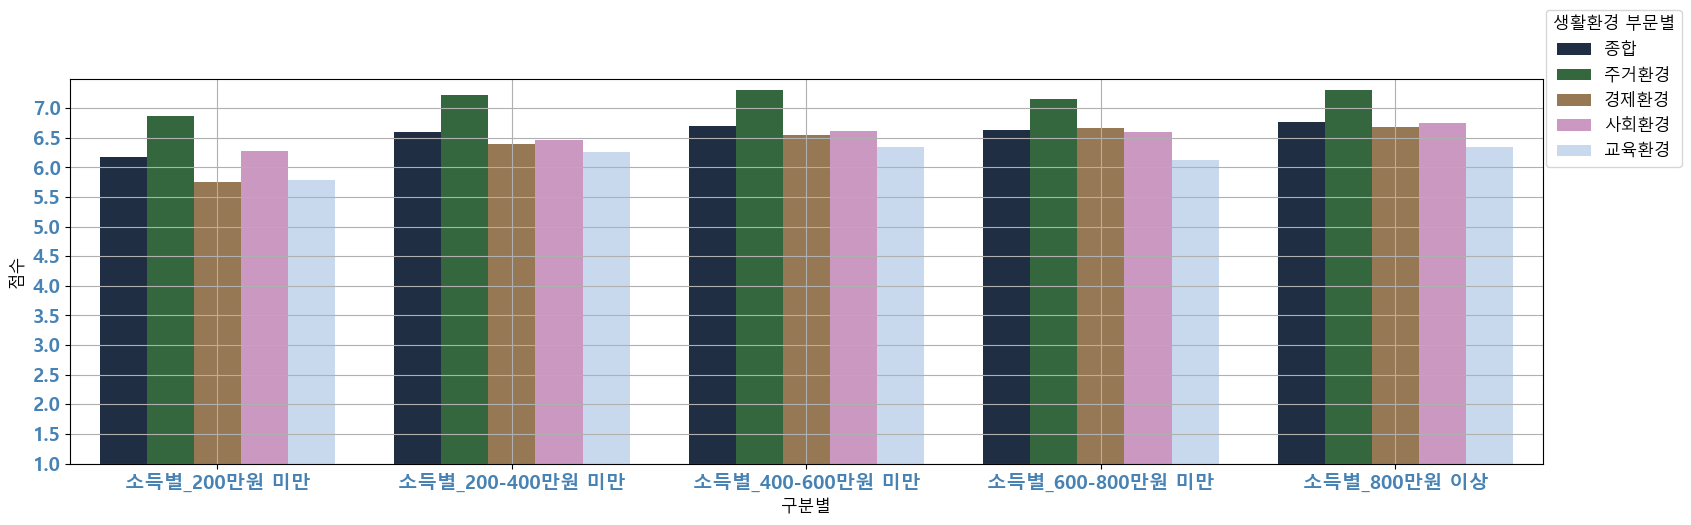

In [217]:
plt.figure(figsize=(19,5))
plt.ylim(1, 7.5)  # y축 눈금 범위 설정 (1부터 7.5까지)
plt.yticks(np.arange(1, 7.5, 0.5))  # y축 눈금 위치 설정 (0.5 간격)
sb.barplot(data=df_money, x='구분별', y='점수', hue='항목',palette='cubehelix')
plt.xticks(fontsize=14,color="steelblue",fontweight='bold')
plt.yticks(fontsize=14,color="steelblue",fontweight='bold')
plt.grid()
plt.legend(title="생활환경 부문별",loc='upper right',bbox_to_anchor=(1.1,1.2))
plt.show()
plt.close()

소득 분위별로 구분지어 그래프 확인 결과 400 - 600만원 미만 / 800만원 이상 2그룹이 만족도가 가장 높은것으로 확인되었다. 첫번째는 중산층, 두번째는 상류층으로 각자의 기준에 만족해서 만족도 수준이 높은것으로 추정되며 600 - 800만원 그룹의 경우 교육환경 만족도가 낮은 것을 알 수 있는데 이는 중산층도 상류층도 아닌 애매한 위치에 있기에 더 높은 단계로 올라가기 위한 과정때문에 교육환경 부문에서 낮게 나온것으로 보여진다. 이와 별개로 전반적인 만족도가 가장 낮은 그룹은 200만원 미만 그룹인 것으로 확인되었다. 당연하겠지만 자본주의인 시대에서 200만원 미만은 기본적인 의식주 자체가 힘든 소득분위며 일반적으로 문화/여가 생활은 누리기 힘들기 때문에 전체적으로 모든 만족도가 떨어지는것으로 보인다.

In [226]:
df_small_area=df.iloc[33:58]
df_small_area

,구분별,종합,주거환경,경제환경,사회환경,교육환경
33,지역소분류_종로구,6.70,7.30,6.80,6.17,6.51
34,지역소분류_중구,6.18,6.91,5.71,6.09,5.99
35,지역소분류_용산구,6.42,6.82,6.07,6.02,6.76
36,지역소분류_성동구,6.73,7.39,6.63,6.54,6.37
37,지역소분류_광진구,6.30,6.93,6.33,6.06,5.87
38,지역소분류_동대문구,6.64,7.24,6.36,6.75,6.23
39,지역소분류_중랑구,6.31,6.70,5.99,6.27,6.27
40,지역소분류_성북구,6.45,7.10,6.38,6.48,5.83
41,지역소분류_강북구,6.86,7.72,6.70,6.65,6.37
42,지역소분류_도봉구,6.15,6.79,6.05,6.14,5.63


In [227]:
#현재 상태로는 한 그래프에 표시할 수 없으므로 멜트 함수 이용해서 재정렬 진행
df_small_area = df_small_area.melt(id_vars=['구분별'], var_name='항목', value_name='점수')
df_small_area

,구분별,항목,점수
0,지역소분류_종로구,종합,6.70
1,지역소분류_중구,종합,6.18
2,지역소분류_용산구,종합,6.42
3,지역소분류_성동구,종합,6.73
4,지역소분류_광진구,종합,6.30
...,...,...,...
120,지역소분류_관악구,교육환경,5.88
121,지역소분류_서초구,교육환경,7.08
122,지역소분류_강남구,교육환경,6.61
123,지역소분류_송파구,교육환경,6.63


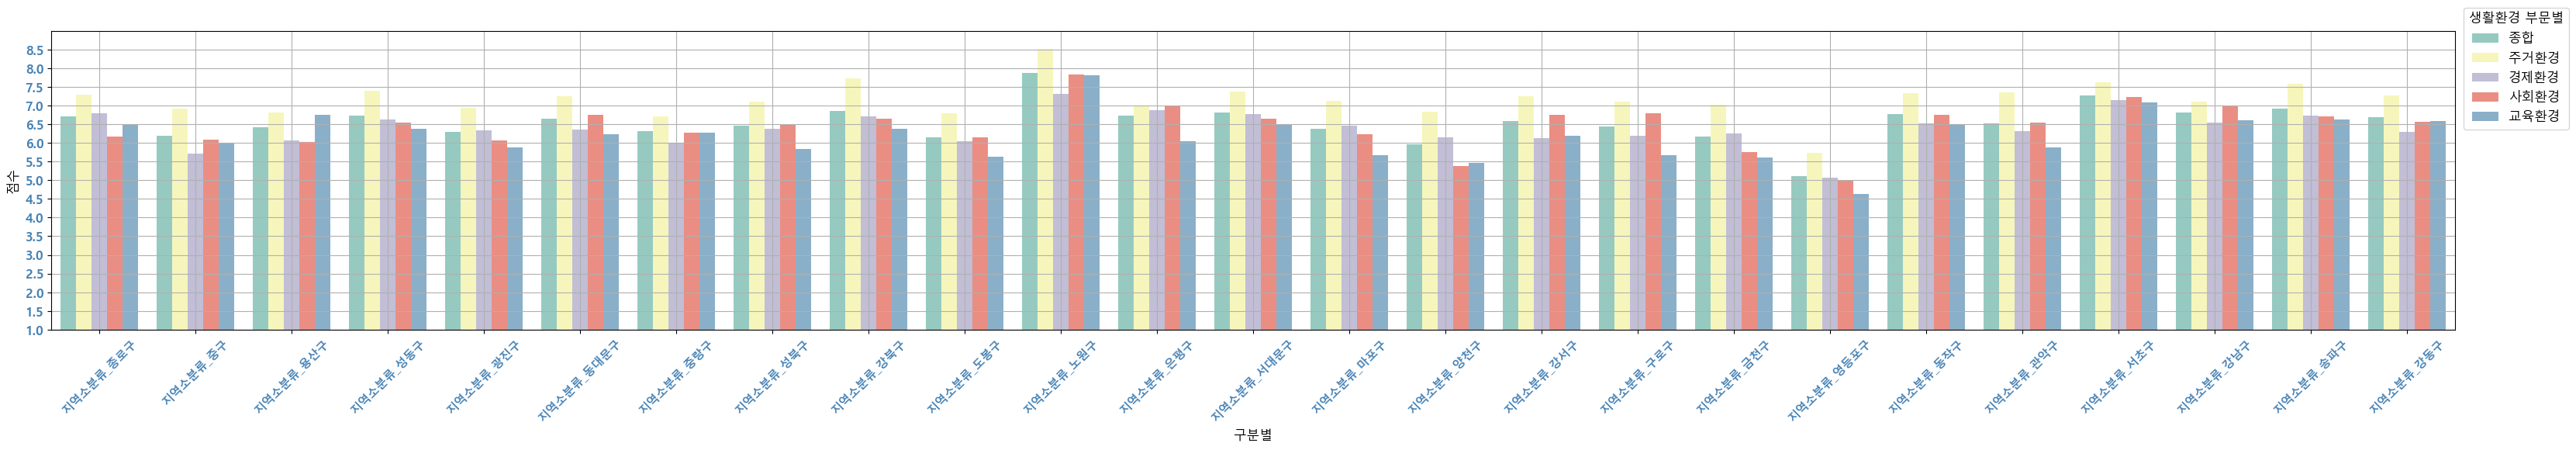

In [242]:
plt.figure(figsize=(40,5))
plt.ylim(1, 9.0)  # y축 눈금 범위 설정 (1부터 7.5까지)
plt.yticks(np.arange(1, 9.0, 0.5))  # y축 눈금 위치 설정 (0.5 간격)
sb.barplot(data=df_small_area, x='구분별', y='점수', hue='항목',palette='Set3')
plt.xticks(fontsize=11,color="steelblue",fontweight='bold',rotation=45)
plt.yticks(fontsize=12,color="steelblue",fontweight='bold')
plt.grid()
plt.legend(title="생활환경 부문별",loc='upper right',bbox_to_anchor=(1.05,1.1))
plt.show()
plt.close()

마지막으로 행정구별로 구분지어 그래프를 확인 결과 `노원구`가 압도적으로 만족지수가 높은것으로 확인되었다. 이는 2가지 때문이라고 예상되는데 첫번째는 노원구에서 현재 진행하고 있는 `마을이 학교다` 정책과 보육/육아에 특히 중점을 두고 있는것에 기인한 바가 크다고 생각(노원구 연구결과보고서(지역발전과 삶의 질 향상을 위한 정책 연구) 내용 참고)되며 두번째로는 부동산을 들 수 있겠다. 2020~2021년 말까지 땅 값이 가장 많이 오른 곳이 노원구이기 때문이다.(관련기사:https://www.mk.co.kr/economy/view.php?sc=50000001&year=2022&no=17542) 만족도 조사 파일은 서울시에서 22년 4월에 공표된것이고 서울시 집값 본격적인 하락 시작은 3분기부터 시작됬다.

(관련기사:https://biz.chosun.com/real_estate/real_estate_general/2022/06/20/LN5FKEXRDNAQDP5L7GGSKS2Z5A/) 그렇기 때문에 노원구는 이 당시 집값이 최절정기였고 그에 기반해서 만족도 지수가 많이 올라간 것으로 추정된다.